# ***Exploratory Data Analysis for Credit Card Data***

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Importing the DataSets

In [3]:
cust = pd.read_csv("Customer Acqusition.csv")
repay = pd.read_csv("Repayment.csv")
spend = pd.read_csv("spend.csv")

## View Information

## Customer

In [4]:
cust.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [5]:
cust.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

## Spend

In [6]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [7]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

## Repay

In [8]:
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [9]:
repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

## Droping Unwanted Columns

In [10]:
cust.drop(['No'], axis=1, inplace=True)

In [11]:
spend.drop(['Sl No:'], axis=1, inplace=True)

In [12]:
repay.drop(['SL No:', 'Unnamed: 4'], axis=1, inplace=True)

## Convert the datatype

In [13]:
spend['Month'] = pd.to_datetime(spend['Month'])

C:\Users\VJahn\AppData\Local\Temp\ipykernel_39016\1599234366.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend['Month'] = pd.to_datetime(spend['Month'])


In [14]:
repay['Month'] = pd.to_datetime(repay['Month'])

C:\Users\VJahn\AppData\Local\Temp\ipykernel_39016\4121015476.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  repay['Month'] = pd.to_datetime(repay['Month'])


## Check Missing Values

In [15]:
cust.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [16]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [17]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [18]:
nan_val = repay[repay.isna().any(axis=1)]

In [19]:
nan_val.head(50)

,Customer,Month,Amount
1500,NaN,NaT,NaN
1501,NaN,NaT,NaN
1502,NaN,NaT,NaN
1503,NaN,NaT,NaN
1504,NaN,NaT,NaN
1505,NaN,NaT,NaN
1506,NaN,NaT,NaN
1507,NaN,NaT,NaN
1508,NaN,NaT,NaN
1509,NaN,NaT,NaN


## Check Duplicates

In [20]:
cust.duplicated().sum()

0

In [21]:
spend.duplicated().sum()

0

In [22]:
repay.duplicated().sum()

22

In [23]:
dup_rec = repay[repay.duplicated()]

In [24]:
dup_rec

,Customer,Month,Amount
1501,NaN,NaT,NaN
1502,NaN,NaT,NaN
1503,NaN,NaT,NaN
1504,NaN,NaT,NaN
1505,NaN,NaT,NaN
1506,NaN,NaT,NaN
1507,NaN,NaT,NaN
1508,NaN,NaT,NaN
1509,NaN,NaT,NaN
1510,NaN,NaT,NaN


## Treat Missing Values

In [25]:
repay.dropna(inplace=True)

In [26]:
repay.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [27]:
repay.duplicated().sum()

0

## 1) In the above dataset

### (a) In case age is less than 18, replace it with mean of age values

In [28]:
mean_age = cust["Age"].mean()

In [30]:
cust.loc[cust["Age"] < 18,"Age"] = mean_age

In [31]:
cust.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


### (b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [32]:
cust_spend = pd.merge(left=cust,right=spend,on="Customer",how="inner")

In [33]:
cust_spend[cust_spend["Amount"] > cust_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [34]:
cust_spend.loc[cust_spend["Amount"] > cust_spend["Limit"],"Amount"] = (50 * cust_spend["Limit"]).div(100)

In [35]:
cust_spend[cust_spend["Amount"] > cust_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


### (c) Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [36]:
cust_repay = pd.merge(left=repay,right=cust,on="Customer",how="inner")

In [37]:
cust_repay[cust_repay["Amount"] > cust_repay["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
18,A8,2004-02-05,156913.59,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,A8,2004-01-12,350999.98,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,A8,2006-03-31,155642.95,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,A8,2005-05-09,145457.38,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,A8,2006-05-08,361184.89,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...
1494,A7,2006-05-06,400375.97,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,2005-12-03,429700.12,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,2005-02-23,344628.72,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,2006-03-31,336264.37,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [38]:
cust_repay.loc[cust_repay["Amount"] > cust_repay["Limit"],"Amount"] = cust_repay["Limit"]

In [39]:
cust_repay[cust_repay["Amount"] > cust_repay["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


## 2) From the above dataset create the following summaries:

### (a) How many distinct customers exist?

In [40]:
distinct_customers = cust["Customer"].nunique()

In [41]:
print(distinct_customers)

100


### (b) How many distinct categories exist?

In [42]:
cust["Segment"].value_counts()

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

### (c) What is the average monthly spend by customers?

In [43]:
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [44]:
spend.head(2)

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004


In [45]:
customer_spend_group = round(spend.groupby(['Yearly','Monthly'])['Amount'].mean(),2)

In [46]:
customer_spend_group

Yearly  Monthly  
2004    April        235272.04
        February     221215.27
        January      251712.07
        March        232146.12
        May          217539.24
        November     270486.40
        September    310923.38
2005    April        252181.33
        August       233734.63
        December     147503.06
        February     229802.28
        January      292741.37
        July         229116.66
        June         262688.11
        May          245696.52
        November     286143.32
        October      194568.64
        September    188666.20
2006    April        232468.97
        August       240699.72
        December     270470.98
        February     253858.26
        January      282058.01
        July         287505.10
        June         177252.39
        March        247166.08
        May          236162.74
        November     182841.29
        October      236136.34
        September    158520.09
Name: Amount, dtype: float64

### (d) What is the average monthly repayment by customers?

In [47]:
repay['Monthly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Yearly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [48]:
repay.head(2)

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004


In [49]:
customer_repay_group= round(repay.groupby(['Yearly','Monthly'])['Amount'].mean(),2)

In [50]:
customer_repay_group

Yearly  Monthly  
2004    April        259141.68
        February     256702.63
        January      243489.65
        March        252585.28
        May          226162.72
        November     209592.24
        September    184487.85
2005    April        212688.63
        August       264430.92
        December     320379.34
        February     238829.27
        January      240548.10
        July         239871.48
        June         210199.82
        May          263207.37
        November     256695.12
        October      219849.96
        September    247700.17
2006    April        275472.25
        August       224143.99
        December     252736.57
        February     284489.57
        January      293475.39
        July         257936.38
        June         251990.45
        March        240851.27
        May          256920.88
        November     199399.20
        October      260765.48
        September    262533.88
Name: Amount, dtype: float64

### (e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?¶

In [51]:
cust_spend_repay = pd.merge(left=cust_spend,right=repay,on="Customer",how="inner")

In [52]:
cust_spend_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004


In [53]:
cust_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [54]:
cust_spend_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Spend_Amount,Month_y,Repay_Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004


In [55]:
interest = cust_spend_repay.groupby(['Yearly', 'Monthly'])[['Spend_Amount', 'Repay_Amount']].sum()

In [56]:
interest

Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [57]:
interest['Monthly Profit'] = interest['Repay_Amount'] - interest['Spend_Amount']

In [58]:
interest

Spend_Amount  Repay_Amount  Monthly Profit
Yearly Monthly                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08
       February   7.613922e+07  1.602419e+08    8.410268e+07
       January    1.088357e+09  1.699210e+09    6.108525e+08
       March      5.594171e+07  8.974470e+07    3.380298e+07
       May        8.800456e+07  1.411594e+08    5.315485e+07
       November   5.504612e+07  7.860290e+07    2.355678e+07
       September  5.144278e+07  8.016122e+07    2.871844e+07
2005   April      9.366405e+07  1.747894e+08    8.112539e+07
       August     1.361400e+08  2.477449e+08    1.116049e+08
       December   4.348638e+07  9.944533e+07    5.595895e+07
       February   5.890557e+08  9.416163e+08    3.525606e+08
       January    1.324129e+08  1.810333e+08    4.862042e+07
       July       3.995653e+07  7.997268e+07    4.001615e+07
       June       1.174019e+08  2.213774e+08    1.039755e+08
       May        7.149030e+08  1.099197e+09    3.842944e+08
       November   1.532278e+08  2.763119e+08    1.230841e+08
       October    3.140993e+07  6.027830e+07    2.886837e+07
       September  3.195551e+07  7.530449e+07    4.334898e+07
2006   April      3.229722e+08  6.093666e+08    2.863944e+08
       August     5.849630e+07  7.167032e+07    1.317402e+07
       December   4.585222e+07  7.087702e+07    2.502480e+07
       February   1.654843e+08  2.903280e+08    1.248436e+08
       January    5.127574e+07  8.974491e+07    3.846917e+07
       July       1.444093e+08  2.245720e+08    8.016271e+07
       June       5.302118e+07  6.914431e+07    1.612313e+07
       March      7.393854e+08  1.115725e+09    3.763400e+08
       May        3.297954e+08  5.434823e+08    2.136869e+08
       November   1.124836e+08  1.355832e+08    2.309955e+07
       October    5.285823e+07  7.890924e+07    2.605102e+07
       September  5.395681e+07  8.083199e+07    2.687518e+07

In [59]:
interest['Interest Earned'] = (2.9* interest['Monthly Profit'])/100

In [60]:
interest

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      1.194516e+08  2.285403e+08    1.090887e+08     3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08     1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07     9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07     1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07     6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07     8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07     2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08     3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07     1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08     1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07     1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07     1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08     3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08     1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08     3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07     8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07     1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08     8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07     3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08     3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07     1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07     2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07     4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08     1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08     6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07     6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+05

### (f) What are the top 5 product types?

In [61]:
spend['Type'].value_counts()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: count, dtype: int64

In [62]:
spend['Type'].value_counts().head()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

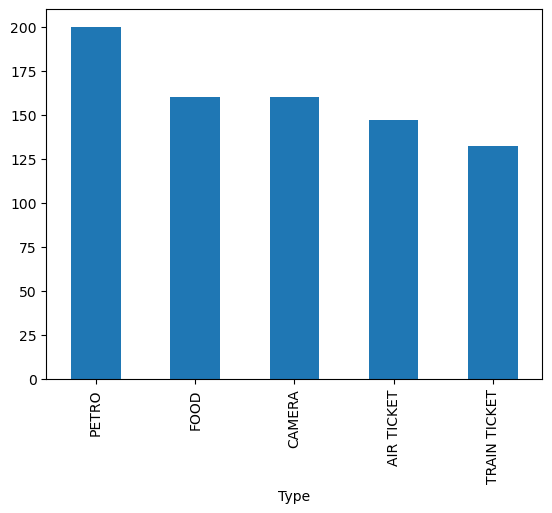

In [63]:
spend['Type'].value_counts().head(5).plot(kind='bar')
plt.show()

### (g) Which city is having maximum spend?

In [64]:
city_spend = cust_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

In [65]:
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

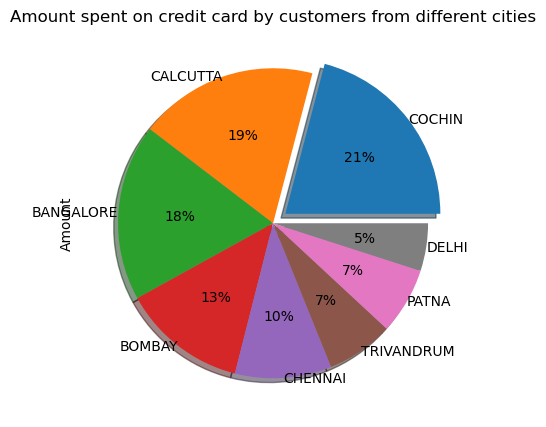

In [66]:
plt.figure(figsize=(5,10))
city_spend.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

### (h) Which age group is spending more money?

In [67]:
cust_spend["Age Group"] =  pd.cut(cust_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [68]:
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82


In [70]:
age_spend = cust_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)

C:\Users\VJahn\AppData\Local\Temp\ipykernel_39016\3792692827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = cust_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)


In [71]:
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

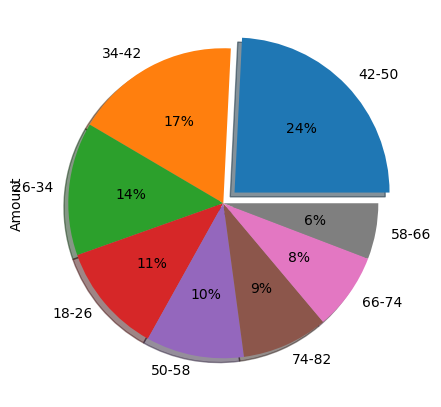

In [72]:
plt.figure(figsize=(5,10))
age_spend.plot(kind = "pie",autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()

### (i) Who are the top 10 customers in terms of repayment?

In [73]:
cust_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [74]:
cust_spend['Yearly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [76]:
customer_spend_pivot = pd.pivot_table(data = cust_spend,index=["City","Yearly"],columns='Product',aggfunc="sum",values="Amount")

In [77]:
customer_spend_pivot

Product                   Gold    Platimum      Silver
City       Yearly                                     
BANGALORE  2004     9289878.54  1112732.30  1291852.58
           2005    12892362.99   912284.97   830612.34
           2006    12030611.09   685831.27  1415480.94
BOMBAY     2004     6987853.53   897264.94   532089.03
           2005     8983018.28   711804.94   508988.54
           2006     7917144.31   972130.01  1092833.80
CALCUTTA   2004     7477140.98  2037690.30   500006.00
           2005    10303355.80  4434696.31   440147.06
           2006    11167532.77  3589606.66  1157956.42
CHENNAI    2004     1059618.50  3535652.38   282056.86
           2005     3740945.58  5053956.32   377184.49
           2006     2704288.62  5024923.40   350009.50
COCHIN     2004     7315850.15  3419904.07   814229.62
           2005    12110613.03  4960921.71   652269.38
           2006    10499142.38  4920592.29  1269990.87
DELHI      2004     2806495.00   283512.89   768172.30
           2005     1964845.27   494157.86   612311.21
           2006     2957103.32   176788.72   854899.97
PATNA      2004     2072567.90  1113069.60   756684.10
           2005     3252615.77  2883231.07   950094.19
           2006     2276181.69  1256137.65   700005.00
TRIVANDRUM 2004     2415102.84  2161676.67   209667.48
           2005     1240375.85  3601443.30   269912.99
           2006     2735710.87  2147403.75   555862.12

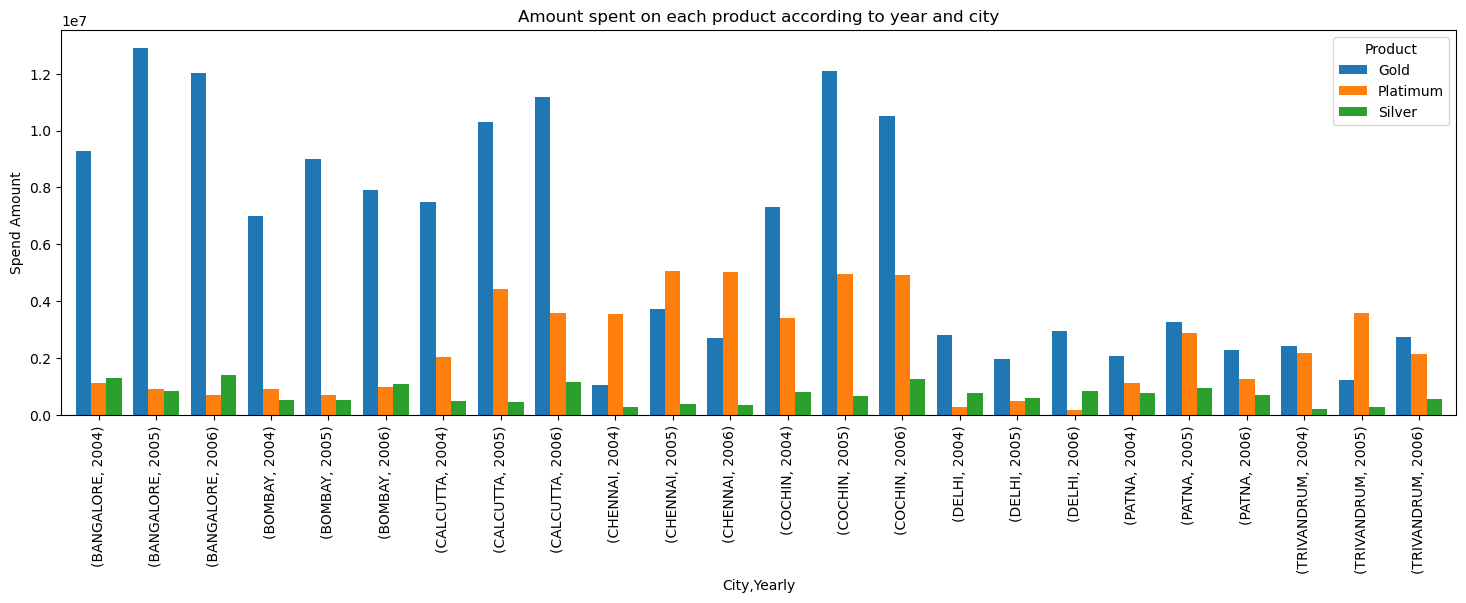

In [78]:
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spent on each product according to year and city")
plt.show()

## 4) Create graphs for

### a) Monthly comparison of total spends, city wise

In [79]:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [80]:
month_city = cust_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [81]:
month_city

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [82]:
month_city =pd.pivot_table(data=cust_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')

In [83]:
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


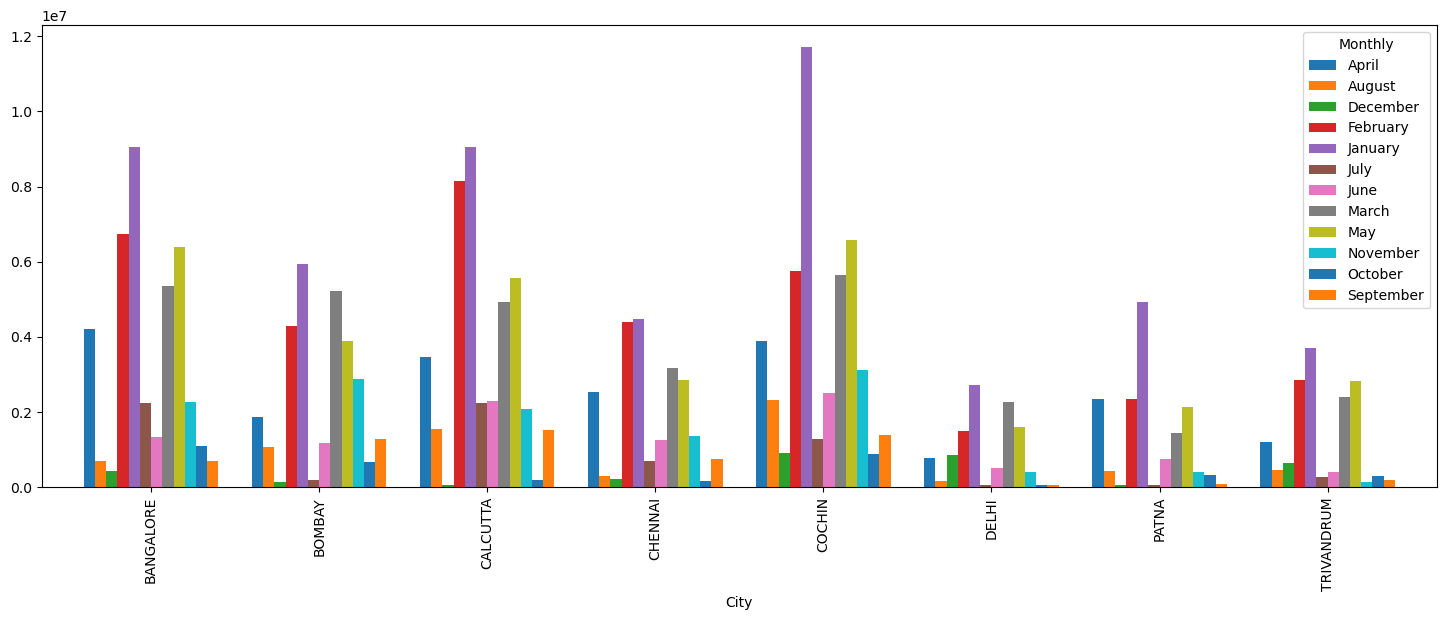

In [84]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

### b) Comparison of yearly spend on air tickets

In [86]:
air_tickets = cust_spend.groupby(["Yearly","Type"])[["Amount"]].sum().reset_index()

In [87]:
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]

In [88]:
filtered

,Yearly,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


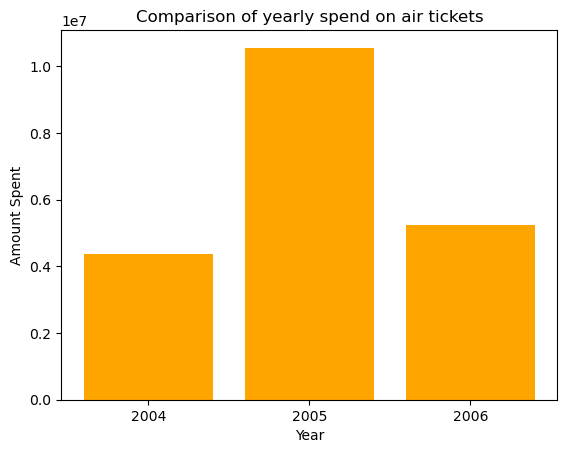

In [89]:
plt.bar(filtered["Yearly"],height=filtered["Amount"],color="orange")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

### c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [90]:
product_wise = pd.pivot_table(data=cust_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')

In [91]:
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


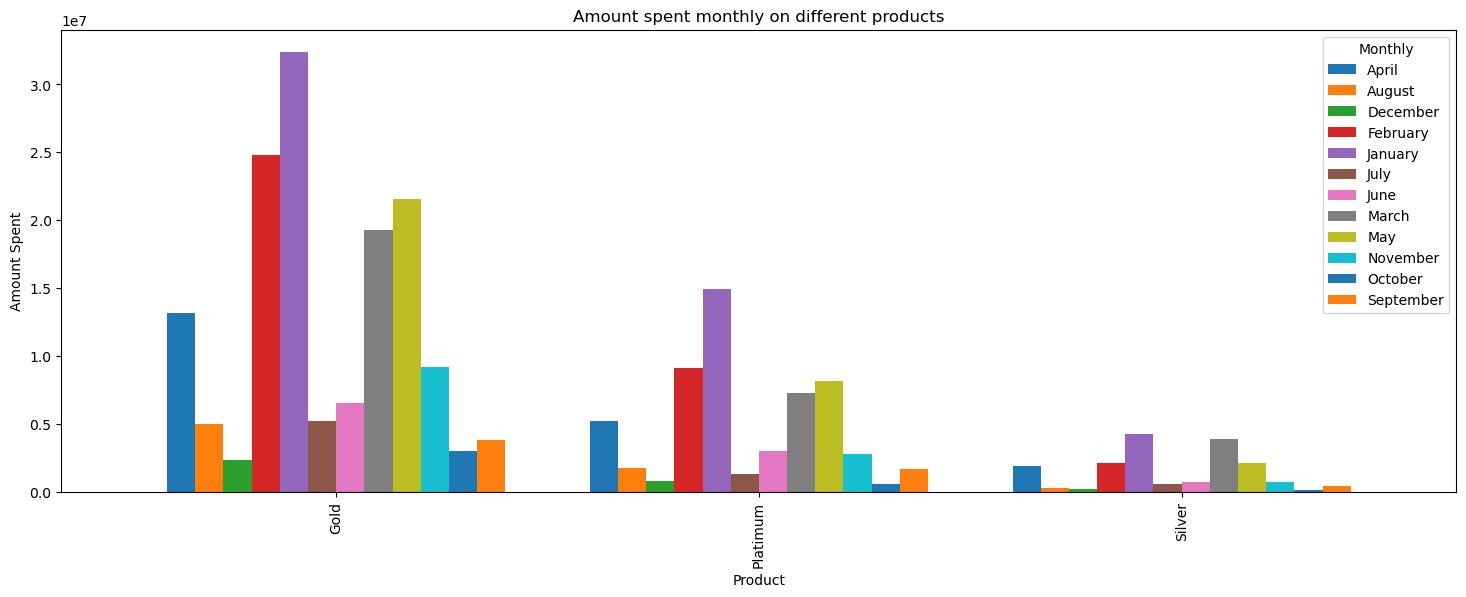

In [92]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spent")
plt.title("Amount spent monthly on different products")
plt.show()

### 5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [93]:
cust_repay['Monthly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_repay['Yearly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [94]:
cust_repay.head(2)

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004


In [95]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [96]:
summary_report('gold','yearly')

Give the product name and timeperiod for which you want the data


Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN